## HTTP

<<지난 주에 했던 것 정리>>

우리가 하려고 하는 것은 웹에서 내가 원하는 데이터를 내 마음대로 원하는 만큼 수집해서 이용할 수 있게 수집기를 만들려고 하는 것.

웹은 HTTP를 통해 통신함.

<span class="mark">HTTP는 Req / Resp 쌍으로 되어 있음(반드시)</span>

urllib(urlopen(Req or String: URL))

조심해야 하는 것은 http를 통해 통신해서 요청 보내고 응답을 받을 수 있는데,
우리가 만든 봇이 상대방 서버에 부담을 주면 안되는 등 확인할 것들이 몇가지 있음. 그런 것들을 다 따지려니 제한적.
그래서 최소한으로 해야하는 것이 Robots.txt 확인
우리는 개인이 쓰고 다른 곳에 배포하지 않고 오로지 공부 또는 연구용으로 쓰고 폐기하고 출저를 기록하고 삭제까지 할 것
이게 우리가 데이터를 이용하기 위해서 최소한 준수해야 하는 룰인 것.

req(요청) 가 됐건 resp(응답) 가 됐건 항상 Header와 Body로 구성. Req/Resp는 Header, Body로 이루어져 있다!

Req = Header, Body(post)

Resp - Header(Status, Reason, Headers...), Body(HTML: Bytes string)

    여기서 우리는 응답받은 것을 Body - read; Bytes -> string(UTF-8, ISO-8859-1)
    
Html Entities(&__16진코드(Hexadecimal__;) -> HTML.unescape 로 변환

실제 구글에 요청해봤음
Req - Header(User-agent) 이 값을 확인함. robots.txt에도 규약 정의.
그리고 파라미터를 봄.

GET 방식 이용. GET Params(QureyString): ?(뒤에가 파라미터), &(각 파라미터 구분), =(키,값 구분)

HTTP의 모든 통신은 Bytes. 우리가 쓰는 한글같은 유니코드를 바꿔줘야 함.

byte 형태로 쿼리스트링 만들어주는 것이 urlencode

urlparse, parse_qs, Non-ascii -> Byte; Quote, Unquote, quote_plus, unquote_plus

여기까지 함.

오늘은 User-agent, Params(GET(Body 사용 x), POST), (un)quote_plus(querystring 쪼갰다가 합쳤다가)

In [1]:
from urllib.request import Request, urlopen
from urllib.parse import urlparse, urlencode, quote, quote_plus, unquote, unquote_plus, parse_qs

In [2]:
quote('한소희'), quote_plus('한 소 희')
# 차이점 구분. 후자(quote_plus)는 띄어쓰기가 ASCII코드로 해석된 것이 아니고 플러스 기호로 대치되어 있음

('%ED%95%9C%EC%86%8C%ED%9D%AC', '%ED%95%9C+%EC%86%8C+%ED%9D%AC')

In [3]:
gurl = 'https://www.google.com/search?q=%ED%95%9C+%EC%86%8C+%ED%9D%AC&rlz=1C5CHFA_enKR1044KR1044&oq=%ED%95%9C+%EC%86%8C+%ED%9D%AC&aqs=chrome.0.0i355i512j46i512j69i60.1920j1j7&sourceid=chrome&ie=UTF-8'
# + 기호가 있음. quote_plus

In [4]:
nurl = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%ED%95%9C+%EC%86%8C+%ED%9D%AC'
# 네이버. 위는 구글

In [ ]:
# 중소형 사이트는 그 사이트가 어떻게 읽느냐에 따라 달라져서 확인하는 것이 좋음

In [5]:
urlparse(gurl)  # 6 components. tuple

ParseResult(scheme='https', netloc='www.google.com', path='/search', params='', query='q=%ED%95%9C+%EC%86%8C+%ED%9D%AC&rlz=1C5CHFA_enKR1044KR1044&oq=%ED%95%9C+%EC%86%8C+%ED%9D%AC&aqs=chrome.0.0i355i512j46i512j69i60.1920j1j7&sourceid=chrome&ie=UTF-8', fragment='')

In [16]:
len(urlparse(gurl)), type(urlparse(gurl))  # 6 components. 객체

(6, urllib.parse.ParseResult)

In [6]:
urlparse(gurl).query

'q=%ED%95%9C+%EC%86%8C+%ED%9D%AC&rlz=1C5CHFA_enKR1044KR1044&oq=%ED%95%9C+%EC%86%8C+%ED%9D%AC&aqs=chrome.0.0i355i512j46i512j69i60.1920j1j7&sourceid=chrome&ie=UTF-8'

In [7]:
parse_qs(urlparse(gurl).query)  # 파라미터를 딕셔너리 형태로 관리할 수 있게 해주는 parse_qs
# 사이트마다 파라미터 의미는 모름. 우리는 q 만 바꿔봤음. 실제 검색에 필요한 파라미터 라는 것(최소 구글의 경우)

{'q': ['한 소 희'],
 'rlz': ['1C5CHFA_enKR1044KR1044'],
 'oq': ['한 소 희'],
 'aqs': ['chrome.0.0i355i512j46i512j69i60.1920j1j7'],
 'sourceid': ['chrome'],
 'ie': ['UTF-8']}

In [9]:
urlparse(gurl).netloc

'www.google.com'

In [19]:
urlparse(gurl).scheme + '://' + urlparse(gurl).netloc + urlparse(gurl).path
# https                  ://    www.google.com             /search

'https://www.google.com/search'

In [10]:
params = {'q':'한소희'}
url = urlparse(gurl).scheme + '://' + urlparse(gurl).netloc + urlparse(gurl).path

In [11]:
params, url

({'q': '한소희'}, 'https://www.google.com/search')

In [12]:
urlencode(params), quote_plus('q=한소희')  # 16진법으로 인코딩함(dict 혹은 tuple을 받음)

('q=%ED%95%9C%EC%86%8C%ED%9D%AC', 'q%3D%ED%95%9C%EC%86%8C%ED%9D%AC')

In [13]:
url + '?' + params

TypeError: can only concatenate str (not "dict") to str

In [14]:
url + '?' + urlencode(params)
# ? 는 파라미터의 시작을 알리기 위함.

'https://www.google.com/search?q=%ED%95%9C%EC%86%8C%ED%9D%AC'

In [15]:
url + '?' + urlencode('한소희')

TypeError: not a valid non-string sequence or mapping object

In [19]:
# GET 방식이니까 url 에 파라미터 붙혀야 함
url + '?' + quote_plus('q=한소희')   # -> 문자열

'https://www.google.com/search?q%3D%ED%95%9C%EC%86%8C%ED%9D%AC'

In [18]:
url + '?' + urlencode(params)

'https://www.google.com/search?q=%ED%95%9C%EC%86%8C%ED%9D%AC'

In [17]:
# GET 방식이니까 url 에 파라미터 붙혀야 함
url + '?' + 'q=한소희'   # -> 문자열
# 이것도 브라우저에서 결과는 잘 나옴.

'https://www.google.com/search?q=한소희'

In [25]:
# headers 'user-agent'에 한글 들어가면 오류남
# quote_plus 말고 밑에 urlencode 쓰기
headers = {
    'user-agent' : 'abcd'
}
req = Request(url + '?' + quote_plus('q=한소희'), headers=headers)
resp = urlopen(req)

In [31]:
headers = {
    'user-agent' : 'abcd'
}
req = Request(url + '?' + urlencode(params), headers=headers)
resp = urlopen(req)

In [32]:
Request(url + '?' + quote_plus('q=한소희'), headers=headers)

In [32]:
resp.status, resp.reason, resp.headers.items()

(200,
 'OK',
 [('Content-Type', 'text/html; charset=ISO-8859-1'),
  ('Date', 'Tue, 14 Mar 2023 12:58:15 GMT'),
  ('Expires', '-1'),
  ('Cache-Control', 'private, max-age=0'),
  ('Content-Security-Policy',
   "object-src 'none';base-uri 'self';script-src 'nonce-AAPjc1g3BOObOJpDDvKhUA' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/xsrp"),
  ('P3P', 'CP="This is not a P3P policy! See g.co/p3phelp for more info."'),
  ('Server', 'gws'),
  ('X-XSS-Protection', '0'),
  ('X-Frame-Options', 'SAMEORIGIN'),
  ('Set-Cookie',
   '1P_JAR=2023-03-14-12; expires=Thu, 13-Apr-2023 12:58:15 GMT; path=/; domain=.google.com; Secure'),
  ('Set-Cookie',
   'AEC=ARSKqsJUSvlKg80-mtiTy1fDqpttRDftCcHZx9VnDsBEfZWsFPVC1JQR83g; expires=Sun, 10-Sep-2023 12:58:15 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax'),
  ('Set-Cookie',
   'NID=511=TytQ20r-zmfqu37jV9DdXNLaybafAz13eJlkyzPfJdcjRaDZ3JqIoWX_G40AM2DveO90C-RrBzxm2Nd1umURt

In [33]:
req.headers.items()

dict_items([('User-agent', 'abcd')])

In [34]:
html = resp.read().decode('ISO-8859-1')
# 여기서 디코드는 위 응답의 headers.items() 보고 캐릭터셋 확인

'<!doctype html><html lang="ko"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>&#54620;&#49548;&#55148; - Google &#44160;&#49353;</title><script nonce="AAPjc1g3BOObOJpDDvKhUA">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.
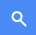
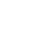
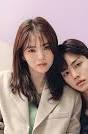
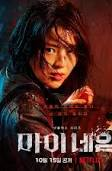
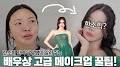
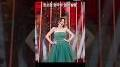

In [35]:
html
# &#50506;&#45716 <- HTML Entities. 16진 코드라서 unescape 사용

'<!doctype html><html lang="ko"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>한소희 - Google 검색</title><script nonce="AAPjc1g3BOObOJpDDvKhUA">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};var h=func
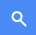
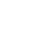
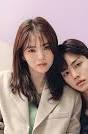
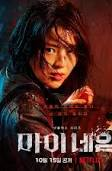
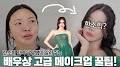
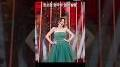

In [36]:
from html import unescape
unescape(html)
# 여기서 한소희-나무위키 찾음 -> Browser(같음)
# 코드로 접근했을 때 누구나 Req/Resp가 브라우저와 다름.
# 결론부터 이야기하면; 코드로 접근했을 때 user-agent가 봇으로 의심되는 경우 구글은 결과를 주긴 하지만 완전히 똑같은 결과를 주진 않음. 
# 그러면 우리가 해야하는 것은 내가 브라우저에서 보는 것과 똑같은 결과를 얻어야 의미가 생김.

In [ ]:
'<body jsmodel="hspDDF">' # Header에 아무값을 넣었을 때 -> 코드로 순수 HTML을 얻어낸 것

In [ ]:
'<body jsmodel="hspDDf" class="srp" jscontroller="Eox39d" marginheight="3" topmargin="3" jsaction="rcuQ6b:npT2md" id="gsr">'
# Header 내 브라우저 -> 순수 HTML(*)

In [ ]:
'<body jsmodel="hspDDf" class="srp EIlDfe" jscontroller="Eox39d" marginheight="3" topmargin="3" jsaction="rcuQ6b:npT2md;xjhTIf:.CLIENT;O2vyse:.CLIENT;IVKTfe:.CLIENT;Ez7VMc:.CLIENT;YUC7He:.CLIENT;hWT9Jb:.CLIENT;WCulWe:.CLIENT;VM8bg:.CLIENT;qqf0n:.CLIENT;szjOR:.CLIENT;YcfJ:.CLIENT;kWlxhc:.CLIENT;JL9QDc:.CLIENT;qGMTIf:.CLIENT;aeBrn:.CLIENT;c0v8t:.CLIENT" id="gsr">'
# Header 내 브라우저 -> DOM(Selenium X)

In [ ]:
# 개발자 도구를 보자

In [ ]:
# 그 값들(코드와 브라우저)을 어떻게 맞추느냐? -> user-agent 에 있음
# elements 는 HTML 문서를 브라우저가 해석해서 자바스크립트에서 활용하는 오브젝트로 변환한 것. 이를 DOM 이라고 부름
# 즉 실질적으로는 HTML을 한번더 해석한 것
# 페이지 소스보기 해서 뜨는 것이 브라우저에서 받는 값임.
# console은 자바스크립트의 커맨드 창. -> 브라우저에 자바스크립트가 들어있는 것.

In [ ]:
# 선생님 자료 중 위의 것(Header 내 브라우저 -> 순수 HTML)이 원래 html, 아래(Header 내 브라우저 -> DOM)가 dom
# 우리가 찾은 것은 위의 것.
# header 아무값 -> 순수 HTML
# 이렇게 다 다른 것이 일반적
# 우리는 코드레벨에서 접근하니까 내 브라우저 값을 썼을때까지는 맞출 수 있음.
# 이 문제를 해결하기 위해서 Selenium 쓸 건데 느려서 안쓰는 것이 좋음
# 그럼 돔 해석 잘 안되는데 어떻게 할 것?
# 그래서 우리는 내 브라우저 순수 HTML을 아주 깊게 파헤칠 것

In [ ]:
# 개발자 도구에서 '네트워크'라는 곳은 실제 req(요청) 전달 했을 때 뒷단에서 쌍으로 왔다갔다 하는 목록 확인 가능. 

In [37]:
# 앞으로 이제 header 는 나의 것을 쓰는 것 (개발자도구 네트워크 요청에서 확인 가능)
headers['user-agent'] = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'

In [38]:
req = Request(url, headers=headers) # header 하나만 교체
resp = urlopen(req)

In [40]:
resp.status, resp.reason, resp.headers.items()
# 아까랑 헤더에서부터 차이남.
# charset 이 UTF-8로 바뀜

(200,
 'OK',
 [('Date', 'Tue, 14 Mar 2023 13:02:34 GMT'),
  ('Expires', '-1'),
  ('Cache-Control', 'private, max-age=0'),
  ('Content-Type', 'text/html; charset=UTF-8'),
  ('Strict-Transport-Security', 'max-age=31536000'),
  ('Cross-Origin-Opener-Policy', 'same-origin-allow-popups; report-to="gws"'),
  ('Report-To',
   '{"group":"gws","max_age":2592000,"endpoints":[{"url":"https://csp.withgoogle.com/csp/report-to/gws/other"}]}'),
  ('Accept-CH', 'Sec-CH-UA-Platform'),
  ('Accept-CH', 'Sec-CH-UA-Platform-Version'),
  ('Accept-CH', 'Sec-CH-UA-Full-Version'),
  ('Accept-CH', 'Sec-CH-UA-Arch'),
  ('Accept-CH', 'Sec-CH-UA-Model'),
  ('Accept-CH', 'Sec-CH-UA-Bitness'),
  ('Accept-CH', 'Sec-CH-UA-Full-Version-List'),
  ('Accept-CH', 'Sec-CH-UA-WoW64'),
  ('Permissions-Policy', 'unload=()'),
  ('Origin-Trial',
   'AqRrpS1jM/HOs1rGR0CnXerKEP/QFz7qj9ApDSZqAO+0U+KcT/h/lxA6akW4ar0kT0V1bw5MD4t8O7L7OFwM5gUAAABfeyJvcmlnaW4iOiJodHRwczovL3d3dy5nb29nbGUuY29tOjQ0MyIsImZlYXR1cmUiOiJQZXJtaXNzaW9uc1BvbGljeV

In [41]:
resp.headers['content-type']
# 우리가 헤더를 제대로 줬기 때문(브라우저 개발자도구-네트워크-header에서 확인한 값으로)

'text/html; charset=UTF-8'

In [42]:
html = resp.read().decode('utf8')
# utf-8이기 때문에 그것으로 디코딩

In [43]:
html

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><link href="/manifest?pwa=webhp" crossorigin="use-credentials" rel="manifest"><title>Google</title><script nonce="jW4FRaUys8zzlGa71qdu0w">(function(){window.google={kEI:\'anAQZPW7Mcr3wAPA3oIg\',kEXPI:\'31\',kBL:\'4YFS\'};google.sn=\'webhp\';google.kHL=\'ko\';})();(function(){\nvar f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}\nfunction n(a,b,c,d,g){var e="";c||-1!==b.search("&ei=")||(e="&ei="+l(d),-1===b.search("&lei=")&&(d=m(d))&&(e+="&lei="+d));d="";!c&&f._cshid&&-1===b.search("&cshid=")&&"slh"!==a&&(d="&cshid="+f._cshid);c=c||"/"+(g||"gen_204")+"?atyp=i&ct="+a+"&c

In [44]:
req = Request(url + '?' + urlencode(params), headers=headers) # header 하나만 교체
resp = urlopen(req)

In [45]:
html = resp.read().decode('utf8')

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>한소희 - Google 검색</title><script nonce="H31H48WFQ8idmsAzyu-kng">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){window.google={kEI:\'_HAQZPnOOp-Rur8PiO-F2A0\',kEXPI:\'31\',kBL:\'4Y1M\'};google.sn=\'web\';google.kHL=\'ko\';})();(function(){\nvar f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}\nfunction n(a,b,c,d,g){var e="";c||-1!==b.search("&ei=")||(e="&ei="+l(d),-1===b.search("&lei=")&&(d=m(d))&&(e+="&lei="+d));d="";!c&&f._cshid&&-1===b.search("&cshid=")&&"slh"!==a&&(d="
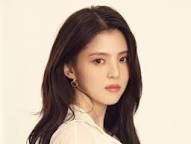
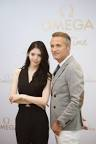
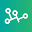
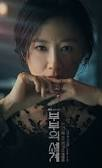
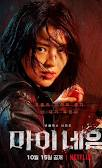
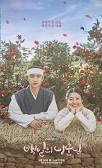
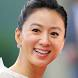
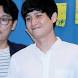
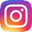
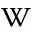
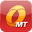
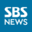
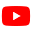
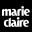
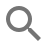
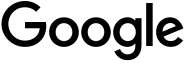

In [46]:
html
# qLRx3b tjvcs GvPZzd cHaqb 들어있는지 찾아보기 (나무위키) => 내가 코드로 찾은 값이랑 브라우저 개발자도구 값이랑 같음을 확인함
# 이제는 어느정도 브라우저에서 본 결과랑 거의 흡사한 결과를 본 것

In [ ]:
# 우리는 class= 라는 값을 쓸 것인데 확인해야 할 것들이 매우 많음. 헤더가 중요.

In [ ]:
# 지금까지 한 것 요약
1. 파라미터 전달 할 때도 바이트로 바꿔야 한다는 것.(urlencode)
2. 헤더에 있는 user-agnet 값만 바꿔줘도 결과를 브라우저에서 받는 결과와 거의 동일하게 받을 수 있다는 것.
3. 헤더가 가장 중요하다!!

In [50]:
nurl = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%ED%95%9C%EC%86%8C%ED%9D%AC'

In [51]:
urlparse(nurl).query

'where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%ED%95%9C%EC%86%8C%ED%9D%AC'

In [52]:
parse_qs(urlparse(nurl).query)

{'where': ['nexearch'],
 'sm': ['top_hty'],
 'fbm': ['1'],
 'ie': ['utf8'],
 'query': ['한소희']}

In [53]:
quote('where=nexearch&query=한소희')

'where%3Dnexearch%26query%3D%ED%95%9C%EC%86%8C%ED%9D%AC'

In [54]:
urlparse(nurl).netloc, quote('where=nexearch&query=한소희')

('search.naver.com', 'where%3Dnexearch%26query%3D%ED%95%9C%EC%86%8C%ED%9D%AC')

In [55]:
resp = urlopen('https://' + urlparse(nurl).netloc + '?' + quote('where=nexearch&query=한소희'))

In [56]:
resp.getheaders() # utf-8 이니까 그냥 변환하면 됨

[('Date', 'Tue, 14 Mar 2023 13:08:39 GMT'),
 ('Content-Type', 'text/html; charset=UTF-8'),
 ('Content-Length', '90'),
 ('Connection', 'close'),
 ('Vary', 'Accept-Encoding'),
 ('Last-Modified', 'Thu, 02 Mar 2023 02:33:46 GMT'),
 ('ETag', '"5a-5f5e1a876d816"'),
 ('Accept-Ranges', 'bytes'),
 ('Vary', 'Accept-Encoding'),
 ('Server', 'nxg')]

In [57]:
resp.read().decode('utf8')

'<script type="text/javascript">window.location.replace("http://www.naver.com/");</script>\n'

In [58]:
req = Request('https://' + urlparse(nurl).netloc + '?' + quote('where=nexearch&query=한소희'))
resp = urlopen(req)

In [59]:
urlparse(nurl)

ParseResult(scheme='https', netloc='search.naver.com', path='/search.naver', params='', query='where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%ED%95%9C%EC%86%8C%ED%9D%AC', fragment='')

In [60]:
resp.read().decode('utf8')

'<script type="text/javascript">window.location.replace("http://www.naver.com/");</script>\n'

In [118]:
','.join(['2','2'])

'2,2'

In [62]:
urlparse(nurl)

ParseResult(scheme='https', netloc='search.naver.com', path='/search.naver', params='', query='where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%ED%95%9C%EC%86%8C%ED%9D%AC', fragment='')

In [63]:
resp = urlopen('https://'+urlparse(nurl).netloc+urlparse(nurl).path+'?'+quote('where=nexearch&query=한소희'))
# scheme :// netloc + path + querySrting

In [64]:
unquote(resp.url)

'https://search.naver.com/search.naver?where=nexearch&query=한소희'

In [65]:
resp.read().decode('utf8')
# 검색어가 안뜸

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content=" : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'\'의 네이버 통합검색 결과입니다."> <title> : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_230216.css"> <link rel="stylesheet" type="text/css" href="https://ss

In [66]:
resp = urlopen('https://'+urlparse(nurl).netloc+urlparse(nurl).path+'?'+'where=nexearch&query=' + quote('한소희'))
# scheme :// netloc + path + querySrting(한글만 byte 변환해야 함 -> 다른 기호들도 변환되기 때문에 검색어 잘 안들어감)

In [67]:
unquote(resp.url)

'https://search.naver.com/search.naver?where=nexearch&query=한소희'

In [68]:
resp.read().decode('utf8')

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="한소희 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'한소희\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'한소희\'의 네이버 통합검색 결과입니다."> <title>한소희 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_230216.css"> <link rel="stylesheet" type="text/css" href

In [ ]:
# 위에서 나무위키 클래스 확인. 같은지
# 네이버는 헤더가 없이 봇이어도 응답하고 응답 결과에 차이도 없음. 가져오는 입장에서는 헤더가 있던 없던 부가적인 옵션들을 안 넣어줘도 검색결과를
# 동일하게 받아올 수 있음. -> 최소 국내 사이트 들은 얼마든지 접근 할수 있고 해외사이트는 정책을 좀 봐야겠구나.

#### HTTP Status Codes

In [ ]:
# http에서 통신하다가 뭐가 안맞으면 오류 메시지를 정해놓음.
# status 200 -> 성공
# 403(권한 없음), 404(없는 페이지)
# 500번대 에러는 서버가 터졌을 때 주로 일어남.
# 400번대는 내가 요청을 잘못하고 내가 없는 곳을 찾으라고 한 것
# 500번대는 서버쪽 에러라서 내 잘못은 없음

In [ ]:
# httpbin.org
# http에 관련된 간략한 정보들 테스트 가능

In [72]:
url = 'http://httpbin.org/status/'
resp = urlopen(url+'404')   # 200, 403, 404, 500, 503 다 돌려보기.

HTTPError: HTTP Error 404: NOT FOUND

In [73]:
resp.status, resp.reason, resp.headers.items()

(200,
 'OK',
 [('Date', 'Tue, 14 Mar 2023 13:12:46 GMT'),
  ('Content-Type', 'text/html; charset=utf-8'),
  ('Content-Length', '0'),
  ('Connection', 'close'),
  ('Server', 'gunicorn/19.9.0'),
  ('Access-Control-Allow-Origin', '*'),
  ('Access-Control-Allow-Credentials', 'true')])

In [74]:
resp.read().decode('utf8')

''

In [75]:
type(resp)  # 이것은 함수가 아니라 객체

http.client.HTTPResponse

In [76]:
# 이런 에러를 잡고 싶으면 try, except 쓰면 좋음
from urllib.error import HTTPError

url = 'http://httpbin.org/status/'

try:
    resp = urlopen(url+'403')
except HTTPError as e:
    #print(resp.status, resp.reason, resp.header.items())
    print(e.status)
    print(e.geturl())
    print(e.reason)
    print(e.headers.items())

403
http://httpbin.org/status/403
FORBIDDEN
[('Date', 'Tue, 14 Mar 2023 13:13:28 GMT'), ('Content-Type', 'text/html; charset=utf-8'), ('Content-Length', '0'), ('Connection', 'close'), ('Server', 'gunicorn/19.9.0'), ('Access-Control-Allow-Origin', '*'), ('Access-Control-Allow-Credentials', 'true')]


In [ ]:
curl -X POST "http://httpbin.org/post" -H "accept: application/json"
GET / POST

In [77]:
# GET 방식
url = 'http://httpbin.org/'
params = {'a':'한소희'}
req = Request(url+'get?'+urlencode(params), method='GET') # 메소드 지정
resp = urlopen(req)
print(resp.read().decode('utf8'))  # 중첩된 오브젝트 형태

{
  "args": {
    "a": "\ud55c\uc18c\ud76c"
  }, 
  "headers": {
    "Accept-Encoding": "identity", 
    "Host": "httpbin.org", 
    "User-Agent": "Python-urllib/3.10", 
    "X-Amzn-Trace-Id": "Root=1-64107343-1fcf547b32e712902662a702"
  }, 
  "origin": "118.131.90.139", 
  "url": "http://httpbin.org/get?a=\ud55c\uc18c\ud76c"
}



In [78]:
resp.getheaders()

[('Date', 'Tue, 14 Mar 2023 13:14:43 GMT'),
 ('Content-Type', 'application/json'),
 ('Content-Length', '330'),
 ('Connection', 'close'),
 ('Server', 'gunicorn/19.9.0'),
 ('Access-Control-Allow-Origin', '*'),
 ('Access-Control-Allow-Credentials', 'true')]

In [79]:
# POST 방식
url = 'http://httpbin.org/'
params = {'a':'한소희'}
req = Request(url+'post', data=urlencode(params).encode('utf8'), method='POST') 
resp = urlopen(req)
print(resp.read().decode('utf8'))

# 확인 두 부분.
# form(data 파라미터가 어떻게 날라갔는지를 form을 보고 확인), url(path 까지만 나옴) 두 부분 확인
# files, json 알맞게 들어가야 함.

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "a": "\ud55c\uc18c\ud76c"
  }, 
  "headers": {
    "Accept-Encoding": "identity", 
    "Content-Length": "29", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "Python-urllib/3.10", 
    "X-Amzn-Trace-Id": "Root=1-64107358-7c24169b790abe17786740b5"
  }, 
  "json": null, 
  "origin": "118.131.90.139", 
  "url": "http://httpbin.org/post"
}



In [80]:
urlencode(params)

'a=%ED%95%9C%EC%86%8C%ED%9D%AC'

In [81]:
urlencode(params).encode('utf8')  # bytes. 모든 통신은 바이트를 사용하기 때문에 이 값을 줘야 함.

b'a=%ED%95%9C%EC%86%8C%ED%9D%AC'

In [82]:
params

{'a': '한소희'}

In [ ]:
# 누구는 바디를 쓰고 누구는 바디를 쓰지 않음. REST - CRUD : GET, POST 방식 다 다름
# GET - search, read
# POST - insert, create
# PUT, PATCH - update
# DELETE - delete

In [83]:
# get/post 방식 혼용
url = 'http://httpbin.org/'
params = {'a':'한소희'}
req = Request(url+'post?'+urlencode(params), data=urlencode(params).encode('utf8'), method='POST') 
resp = urlopen(req)
print(resp.read().decode('utf8'))

{
  "args": {
    "a": "\ud55c\uc18c\ud76c"
  }, 
  "data": "", 
  "files": {}, 
  "form": {
    "a": "\ud55c\uc18c\ud76c"
  }, 
  "headers": {
    "Accept-Encoding": "identity", 
    "Content-Length": "29", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "Python-urllib/3.10", 
    "X-Amzn-Trace-Id": "Root=1-641073b8-684b21fa03365a130fb466cb"
  }, 
  "json": null, 
  "origin": "118.131.90.139", 
  "url": "http://httpbin.org/post?a=\ud55c\uc18c\ud76c"
}



싱글페이지를 아무런 파라미터 없이 리퀘스트 하면 문제될 것이 없음. 그러나 우리가 쓰는 웹에 있는 모든 구조는
사용자의 요청에 의해 서로 다른 결과를 내보냄. 그래서 파라미터를 꼭 전달해줘야함.
그 파라미터를 전달하는 방식에서 주소에 쓰느냐 body에 쓰느냐. 파라미터에 해당되는 form, file, json 은 겟 방식에는 없음.
파라미터가 잘 넘어갔구나, 겟에서는 args에 잘 전달됐는지 알 수 있음.
포스트로 보냈을 때 파라미터 form에 들어있음.
마지막은 포스트 방식이라서 form에 넣은 것 까지 됨. 문제는 주소에도 전달을 하면 그게 겟일까 포스트일까?
일단 파라미터는 둘 다 받음

In [95]:
# get/post 방식 혼용
url = 'http://httpbin.org/'
params = {'a':'한소희'}
req = Request(url+'post?b=abcd', data=urlencode(params).encode('utf8'), method='POST') 
resp = urlopen(req)
#print(resp.read().decode('utf8')) # byte를 디코드 했기 때문에 문자열
# 아래에서 read 를 할 것이기 때문에 바로 위 라인을 주석처리.

이게 GET 방식일까 POST 방식일까?
데이터를 전달하는 방식은 BODY 영역을 쓰냐 안쓰냐로 구분. GET은 주소(URL)에 전달, POST는 BODY(form data)에 전달.
결론은 BODY를 사용한 POST. 우리는 요청의 인자 중 method 만 보면 됨.
우선 봐야하는 것은 Method를 무슨 방식으로 통신했는가. Request() 안에서. 그런데 주소에도 분기해서 넣어줄 수 있음.
여기서 GET은 그냥 주소에 붙은 것.
왜 이런식으로 혼용할까? -> 주소는 길이의 제약이 있음. 그래서 많은 정보를 심을 수 없음(파라미터에). 그리고 반드시 ASCII 코드로 변환해야 함.
문자로 날라간다는 것. 그리고 주소라서 고스란히 노출됨. POST는 form 에다가 byte 단위로 집어넣음.
어떤 종류의 데이터든지 데이터로서 바디 영역에 심어서 전달할 수 있음. 
이미지, 파일 등등 다 가능. 길이에 제한도 없음. form 을 사용하면 길이 제한 없고 바이트이고.
따라서 바이트이기 때문에 다른 것들을 붙힐 수 있음(암호화 등등). 
즉 이런 식으로 GET과 POST를 섞어 놓으면 데이터를 숨길 수 있고 함.
그러니까 단순히 주소에 파라미터에 있다고 해서 GET이 아님. 상대방 서버가 어떤 방식으로 통신을 했는지를 봐야 함.
본질은 http method에 의해서 통신이 되는 것이니까 그 method를 확인해야 함

In [85]:
import json  # 파이썬에서 보면 json 은 dict 과 비슷한 점이 매우 많음

In [86]:
json.loads('{"a":"asdasda", "b":[1,2,3]}')

{'a': 'asdasda', 'b': [1, 2, 3]}

In [87]:
type(json.loads('{"a":"asdasda", "b":[1,2,3]}'))

dict

In [88]:
temp = json.loads('{"a":"asdasda", "b":[1,2,3]}')
type(temp)

dict

In [89]:
type(temp['a']), type(temp['b']), type(temp['b'][0])

(str, list, int)

In [92]:
resp.read().decode('utf8')

'{\n  "args": {\n    "b": "abcd"\n  }, \n  "data": "", \n  "files": {}, \n  "form": {\n    "a": "\\ud55c\\uc18c\\ud76c"\n  }, \n  "headers": {\n    "Accept-Encoding": "identity", \n    "Content-Length": "29", \n    "Content-Type": "application/x-www-form-urlencoded", \n    "Host": "httpbin.org", \n    "User-Agent": "Python-urllib/3.10", \n    "X-Amzn-Trace-Id": "Root=1-641074cb-60a9494c5b2dbc7a0f8947d3"\n  }, \n  "json": null, \n  "origin": "118.131.90.139", \n  "url": "http://httpbin.org/post?b=abcd"\n}\n'

In [94]:
json.loads(resp.read().decode('utf8')) 

{'args': {'b': 'abcd'},
 'data': '',
 'files': {},
 'form': {'a': '한소희'},
 'headers': {'Accept-Encoding': 'identity',
  'Content-Length': '29',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'Python-urllib/3.10',
  'X-Amzn-Trace-Id': 'Root=1-64107502-67477eaa1e022f405526556c'},
 'json': None,
 'origin': '118.131.90.139',
 'url': 'http://httpbin.org/post?b=abcd'}

In [96]:
# read()는 한번 읽으면 메모리에서 없애기 때문에 resp로 할당해준 것을 계속 실행해줘야 결과값을 가질 수 있음. 매번 번거로우니 할당한 것
temp = json.loads(resp.read().decode('utf8'))   # 객체임

In [97]:
temp.keys()

dict_keys(['args', 'data', 'files', 'form', 'headers', 'json', 'origin', 'url'])

In [98]:
temp['form'].keys()

dict_keys(['a'])

In [100]:
json.dumps(temp)

'{"args": {"b": "abcd"}, "data": "", "files": {}, "form": {"a": "\\ud55c\\uc18c\\ud76c"}, "headers": {"Accept-Encoding": "identity", "Content-Length": "29", "Content-Type": "application/x-www-form-urlencoded", "Host": "httpbin.org", "User-Agent": "Python-urllib/3.10", "X-Amzn-Trace-Id": "Root=1-6410752e-305331b84446bd281c3cfe90"}, "json": null, "origin": "118.131.90.139", "url": "http://httpbin.org/post?b=abcd"}'

In [101]:
json.dumps(temp).encode('utf8') # encode() 는 바이트로 바꿔주는 것

b'{"args": {"b": "abcd"}, "data": "", "files": {}, "form": {"a": "\\ud55c\\uc18c\\ud76c"}, "headers": {"Accept-Encoding": "identity", "Content-Length": "29", "Content-Type": "application/x-www-form-urlencoded", "Host": "httpbin.org", "User-Agent": "Python-urllib/3.10", "X-Amzn-Trace-Id": "Root=1-6410752e-305331b84446bd281c3cfe90"}, "json": null, "origin": "118.131.90.139", "url": "http://httpbin.org/post?b=abcd"}'

In [102]:
params = {
    '이름' : '한소희',
    '특징' : '어쩌고저쩌고'
}

In [103]:
params

{'이름': '한소희', '특징': '어쩌고저쩌고'}

In [104]:
json.dumps(params)  # str # dumps ; str -> json 객체  / dump; file ->

'{"\\uc774\\ub984": "\\ud55c\\uc18c\\ud76c", "\\ud2b9\\uc9d5": "\\uc5b4\\uca4c\\uace0\\uc800\\uca4c\\uace0"}'

In [105]:
json.dumps(params).encode('utf8') # byte

b'{"\\uc774\\ub984": "\\ud55c\\uc18c\\ud76c", "\\ud2b9\\uc9d5": "\\uc5b4\\uca4c\\uace0\\uc800\\uca4c\\uace0"}'

In [109]:
url, params

('http://httpbin.org/', {'이름': '한소희', '특징': '어쩌고저쩌고'})

In [115]:
req = Request(url+'post', data=json.dumps(params).encode('utf8'), method='POST')
resp = urlopen(req)

In [111]:
print(resp.read().decode('utf8'))

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "{\"\\uc774\\ub984\": \"\\ud55c\\uc18c\\ud76c\", \"\\ud2b9\\uc9d5\": \"\\uc5b4\\uca4c\\uace0\\uc800\\uca4c\\uace0\"}": ""
  }, 
  "headers": {
    "Accept-Encoding": "identity", 
    "Content-Length": "94", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "Python-urllib/3.10", 
    "X-Amzn-Trace-Id": "Root=1-641075ea-1861ec843ee7aa635ea088af"
  }, 
  "json": null, 
  "origin": "118.131.90.139", 
  "url": "http://httpbin.org/post"
}



In [114]:
json.loads(resp.read().decode('utf8'))

{'args': {},
 'data': '',
 'files': {},
 'form': {'{"\\uc774\\ub984": "\\ud55c\\uc18c\\ud76c", "\\ud2b9\\uc9d5": "\\uc5b4\\uca4c\\uace0\\uc800\\uca4c\\uace0"}': ''},
 'headers': {'Accept-Encoding': 'identity',
  'Content-Length': '94',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'Python-urllib/3.10',
  'X-Amzn-Trace-Id': 'Root=1-64107626-7e939448511dc39452aa177d'},
 'json': None,
 'origin': '118.131.90.139',
 'url': 'http://httpbin.org/post'}

In [116]:
temp = json.loads(resp.read().decode('utf8'))['form']

In [117]:
type(temp), temp

(dict,
 {'{"\\uc774\\ub984": "\\ud55c\\uc18c\\ud76c", "\\ud2b9\\uc9d5": "\\uc5b4\\uca4c\\uace0\\uc800\\uca4c\\uace0"}': ''})

In [118]:
temp.keys(), list(temp.keys())[0]

(dict_keys(['{"\\uc774\\ub984": "\\ud55c\\uc18c\\ud76c", "\\ud2b9\\uc9d5": "\\uc5b4\\uca4c\\uace0\\uc800\\uca4c\\uace0"}']),
 '{"\\uc774\\ub984": "\\ud55c\\uc18c\\ud76c", "\\ud2b9\\uc9d5": "\\uc5b4\\uca4c\\uace0\\uc800\\uca4c\\uace0"}')

In [119]:
json.loads(list(temp.keys())[0])

{'이름': '한소희', '특징': '어쩌고저쩌고'}

In [120]:
params    # 값이 같은 아이임.

{'이름': '한소희', '특징': '어쩌고저쩌고'}

In [ ]:
# json 전달했다가 json 전달받고 풀어내는 것까지 해봄.

#### requests

In [ ]:
# requests 는 객체
# requests 는 다 http 메소드에 관련된 것을 가지고 있음. 파라미터 쓰는 법은 다 다름.
# requests.response 이것은 response 객체. 더이상 read() 할 필요 없음

In [121]:
from requests import get, post, request

In [122]:
url

'http://httpbin.org/'

In [123]:
params

{'이름': '한소희', '특징': '어쩌고저쩌고'}

In [124]:
resp = get(url+'get', params=params)

In [125]:
# 결과 보기
type(resp.content), type(resp.text), type(resp.json())

(bytes, str, dict)

In [126]:
from requests.compat import unquote

In [127]:
resp.json()

{'args': {'이름': '한소희', '특징': '어쩌고저쩌고'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, br',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.28.1',
  'X-Amzn-Trace-Id': 'Root=1-64107688-7dd41ac469cb66bc36f2a919'},
 'origin': '118.131.90.139',
 'url': 'http://httpbin.org/get?이름=한소희&특징=어쩌고저쩌고'}

In [128]:
resp = post(url+'post', data=params, json=json.dumps(params)) # json.dumps 는 str을 json 객체로.

In [129]:
resp.json()

{'args': {},
 'data': '',
 'files': {},
 'form': {'이름': '한소희', '특징': '어쩌고저쩌고'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, br',
  'Content-Length': '120',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.28.1',
  'X-Amzn-Trace-Id': 'Root=1-641076e8-51ca5eae38fca8a52ffda509'},
 'json': None,
 'origin': '118.131.90.139',
 'url': 'http://httpbin.org/post'}

In [130]:
resp = post(url+'post', params=params, data=params)

In [131]:
# GET, POST 혼용
resp.json()

{'args': {'이름': '한소희', '특징': '어쩌고저쩌고'},
 'data': '',
 'files': {},
 'form': {'이름': '한소희', '특징': '어쩌고저쩌고'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, br',
  'Content-Length': '120',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.28.1',
  'X-Amzn-Trace-Id': 'Root=1-641076f7-4db9278323669112415af49e'},
 'json': None,
 'origin': '118.131.90.139',
 'url': 'http://httpbin.org/post?이름=한소희&특징=어쩌고저쩌고'}

In [ ]:
# urllib 보다 훨씬 더 간결함
# 좀 더 보자.

In [132]:
# urllib의 경우
# urlparse: scheme + netloc + path + querystring(urlencode로 문자열로 붙혀줌)

# requests의 경우
url = 'https://www.google.com/search'
params = {'q' : '한소희'}
resp = get(url, params=params)

In [133]:
resp.url # params 가 알아서 hexadecimal로 들어감. 우리는 dict만 관리하면 됨. 즉 requests가 알아서 해주는 것.

'https://www.google.com/search?q=%ED%95%9C%EC%86%8C%ED%9D%AC'

In [ ]:
# 패키지 이용을 위해 알아야 하는 것들

In [134]:
# response 확인
resp.status_code, resp.reason, resp.headers

(200,
 'OK',
 {'Content-Type': 'text/html; charset=ISO-8859-1', 'Date': 'Tue, 14 Mar 2023 13:31:42 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Security-Policy': "object-src 'none';base-uri 'self';script-src 'nonce-VpVEuhodrxtsPFwQBgKR0g' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/xsrp", 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '1P_JAR=2023-03-14-13; expires=Thu, 13-Apr-2023 13:31:42 GMT; path=/; domain=.google.com; Secure, AEC=ARSKqsIycB5HYq1HpXPfRn5KfE0_-DATMnj9duUnKUos9UXyRCINOdEfaw; expires=Sun, 10-Sep-2023 13:31:42 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax, NID=511=Kx-zcXbzoTyRbJunJEtU8hgaF8I5JqDgAkgyD3wVw06atH2LGBcBy7UCylEaPAjuThAuZaZnh_mhUvTex2J8VVTG4u4tg-QXwc4EX1ZGA5DI_RYa1fmq18MQQNPyHxhOABV3k-YTjUwMVEXm8_M

In [135]:
# request 확인
resp.request.body, resp.request.headers, resp.request.url
# GET 방식이라 BODY에 아무것도 없음. 그리고 Header에 default로 가져야 하는 값이 몇 개 들어감.

(None,
 {'User-Agent': 'python-requests/2.28.1', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'},
 'https://www.google.com/search?q=%ED%95%9C%EC%86%8C%ED%9D%AC')

In [136]:
resp.headers['content-type']

'text/html; charset=ISO-8859-1'

In [137]:
resp.encoding  # user-agent 값 때문

'ISO-8859-1'

'<!doctype html><html lang="ko"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>&#54620;&#49548;&#55148; - Google &#44160;&#49353;</title><script nonce="VpVEuhodrxtsPFwQBgKR0g">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.
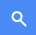
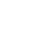
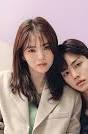
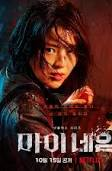
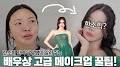
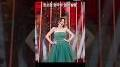

In [138]:
resp.text
# ASCII로 해석 해놓음
# urllib 처럼 한번 read 하면 또 불러와야 하지 않아도 됨

In [139]:
# 여기에 값을 주면 인코딩이 바뀜
resp.encoding = 'utf8'

In [140]:
resp.encoding

'utf8'

In [141]:
resp = get(url, params=params, headers=headers)

In [142]:
resp.request.headers

{'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [143]:
resp.headers['content-type']

'text/html; charset=UTF-8'

In [144]:
resp.encoding # 요청의 헤더 에서 user-agent 바꿔주니 잘 됨

'UTF-8'

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>한소희 - Google 검색</title><script nonce="s7BxKx_e-q5xm8vGwQXpFw">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){window.google={kEI:\'_XoQZI6yHfe6kPIPnfSNgAY\',kEXPI:\'31\',kBL:\'4Y1M\'};google.sn=\'web\';google.kHL=\'ko\';})();(function(){\nvar f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}\nfunction n(a,b,c,d,g){var e="";c||-1!==b.search("&ei=")||(e="&ei="+l(d),-1===b.search("&lei=")&&(d=m(d))&&(e+="&lei="+d));d="";!c&&f._cshid&&-1===b.search("&cshid=")&&"slh"!==a&&(d="
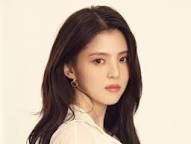
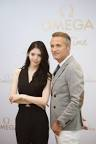
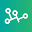
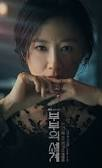
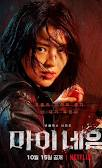
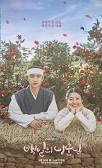
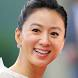
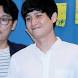
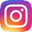
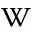
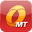
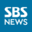
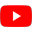
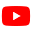
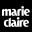
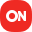
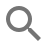
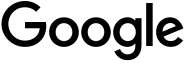

In [145]:
resp.text

In [146]:
from requests import request

In [147]:
help(request)

Help on function request in module requests.api:

request(method, url, **kwargs)
    Constructs and sends a :class:`Request <Request>`.
    
    :param method: method for the new :class:`Request` object: ``GET``, ``OPTIONS``, ``HEAD``, ``POST``, ``PUT``, ``PATCH``, or ``DELETE``.
    :param url: URL for the new :class:`Request` object.
    :param params: (optional) Dictionary, list of tuples or bytes to send
        in the query string for the :class:`Request`.
    :param data: (optional) Dictionary, list of tuples, bytes, or file-like
        object to send in the body of the :class:`Request`.
    :param json: (optional) A JSON serializable Python object to send in the body of the :class:`Request`.
    :param headers: (optional) Dictionary of HTTP Headers to send with the :class:`Request`.
    :param cookies: (optional) Dict or CookieJar object to send with the :class:`Request`.
    :param files: (optional) Dictionary of ``'name': file-like-objects`` (or ``{'name': file-tuple}``) for 

In [148]:
resp = post('http://httpbin.org/post', data=params)

In [149]:
resp.request.headers, resp.request.body

({'User-Agent': 'python-requests/2.28.1', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive', 'Content-Length': '29', 'Content-Type': 'application/x-www-form-urlencoded'},
 'q=%ED%95%9C%EC%86%8C%ED%9D%AC')

In [150]:
resp.json()

{'args': {},
 'data': '',
 'files': {},
 'form': {'q': '한소희'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, br',
  'Content-Length': '29',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.28.1',
  'X-Amzn-Trace-Id': 'Root=1-64107b14-4897656d7efd33d14b8a715f'},
 'json': None,
 'origin': '118.131.90.139',
 'url': 'http://httpbin.org/post'}

In [151]:
resp = post('http://httpbin.org/post', params=params, data=params)

In [152]:
resp.request.url, resp.request.headers, resp.request.body

('http://httpbin.org/post?q=%ED%95%9C%EC%86%8C%ED%9D%AC',
 {'User-Agent': 'python-requests/2.28.1', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive', 'Content-Length': '29', 'Content-Type': 'application/x-www-form-urlencoded'},
 'q=%ED%95%9C%EC%86%8C%ED%9D%AC')

In [ ]:
# 지금까지 요청/반응 쌍. 그 다음에 헤더와 바디 봤음
# 여기서는 에러를 어떻게 처리?

In [153]:
url = 'http://httpbin.org/status/'
resp = get(url+'403')
# urllib 에서는 하자마자 바로 오류났음. 그런데 request 패키지는 아님.

In [154]:
resp.status_code, resp.reason, resp.headers

(403,
 'FORBIDDEN',
 {'Date': 'Tue, 14 Mar 2023 13:48:57 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '0', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'})

In [155]:
resp.raise_for_status()

HTTPError: 403 Client Error: FORBIDDEN for url: http://httpbin.org/status/403

In [156]:
from requests.exceptions import HTTPError
try:
    resp.raise_for_status()
except HTTPError as e:
    print(e)

403 Client Error: FORBIDDEN for url: http://httpbin.org/status/403


In [ ]:
# urllib 보다 굉장히 편함을 지금 배우고 있는 것. 복습하면서 느껴보자.

In [95]:
# 구글 검색 결과를 가져와보기
url = 'https://www.google.com/search'
params = {'q' : '한소희'}
resp = get(url, params=params, headers=headers)
data = '<h3 class="LC20lb MBeuO DKV0Md">한소희 - 나무위키</h3>'

In [96]:
# 내가 원하는 콘텐츠를 가져오는 부분을 할 것.
import re

In [97]:
re.search('<h3.+>(.+)</h3>', data).group(1)

'한소희 - 나무위키'

In [98]:
re.findall('<h3.+>(.+)</h3>', resp.text)

['한소희 (@xeesoxee) • Instagram photos and videos',
 '설명',
 '한소희, 만취해 길거리에 大자로…&quot;다시는 술 먹지 않겠습니다&quot;']

['이미지</h3><div class="wDYxhc NFQFxe oHglmf xzPb7d" data-md="32" style="clear:none" data-hveid="CDIQAA" data-ved="2ahUKEwig7YeSm9n9AhXWmFYBHRonBckQ4dMGegQIMhAA"><div style="position:relative;overflow:visible" class="kno-mrg kno-swp" id="media_result_group" data-hveid="CDIQAQ"><div class="kno-fiu kno-liu"><div jsmodel="Wn3aEc" data-count="6" data-hveid="CDAQAA"><div></div><div class="xte2qe OXEsB o6uAG"><div jsmodel="" jscontroller="fhcUyb" jsaction="PdWSXe:h5M12e;rcuQ6b:npT2md;eJDJ0e:mRGGY;vGTXyb:T2P31d" jsdata="X2sNs;_;BD32eU"><div class="RYdNQb" data-h="130" data-nr="1" style="border-top-left-radius:8px;border-top-right-radius:8px;margin-right:-2px;margin-bottom:-2px" data-ved="2ahUKEwig7YeSm9n9AhXWmFYBHRonBckQxDAoAHoECDAQAg"><div jsname="dTDiAc" class="eA0Zlc WghbWd ivg-i PZPZlf PtaMgb GMCzAd" jscontroller="Um3BXb" jsdata="j0Opre;aO6qao2nzpyAvM;BD32ec" data-attrid="secondary image" data-docid="aO6qao2nzpyAvM" data-lpage="http://tnnews.co.kr/archives/51131" data-ref-docid="8vm0DwCSyIe
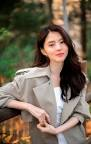
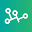
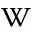
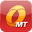
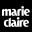
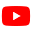
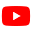
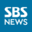

In [100]:
re.findall('<h3.+?>(.+)</h3>', resp.text)

['이미지</h3><div class="wDYxhc NFQFxe oHglmf xzPb7d" data-md="32" style="clear:none" data-hveid="CDIQAA" data-ved="2ahUKEwig7YeSm9n9AhXWmFYBHRonBckQ4dMGegQIMhAA"><div style="position:relative;overflow:visible" class="kno-mrg kno-swp" id="media_result_group" data-hveid="CDIQAQ"><div class="kno-fiu kno-liu"><div jsmodel="Wn3aEc" data-count="6" data-hveid="CDAQAA"><div></div><div class="xte2qe OXEsB o6uAG"><div jsmodel="" jscontroller="fhcUyb" jsaction="PdWSXe:h5M12e;rcuQ6b:npT2md;eJDJ0e:mRGGY;vGTXyb:T2P31d" jsdata="X2sNs;_;BD32eU"><div class="RYdNQb" data-h="130" data-nr="1" style="border-top-left-radius:8px;border-top-right-radius:8px;margin-right:-2px;margin-bottom:-2px" data-ved="2ahUKEwig7YeSm9n9AhXWmFYBHRonBckQxDAoAHoECDAQAg"><div jsname="dTDiAc" class="eA0Zlc WghbWd ivg-i PZPZlf PtaMgb GMCzAd" jscontroller="Um3BXb" jsdata="j0Opre;aO6qao2nzpyAvM;BD32ec" data-attrid="secondary image" data-docid="aO6qao2nzpyAvM" data-lpage="http://tnnews.co.kr/archives/51131" data-ref-docid="8vm0DwCSyIe
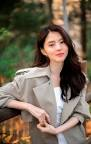
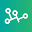
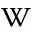
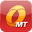
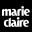
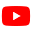
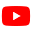
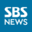

In [101]:
re.findall('<h3[^>]+?>(.+)</h3>', resp.text)

In [ ]:
#re.findall('<h3\s+class=\"LC201b[^>]+?>(.+)</h3>', resp.text)

[]

In [ ]:
수요일 - 구글검색결과부터 다시